First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol  

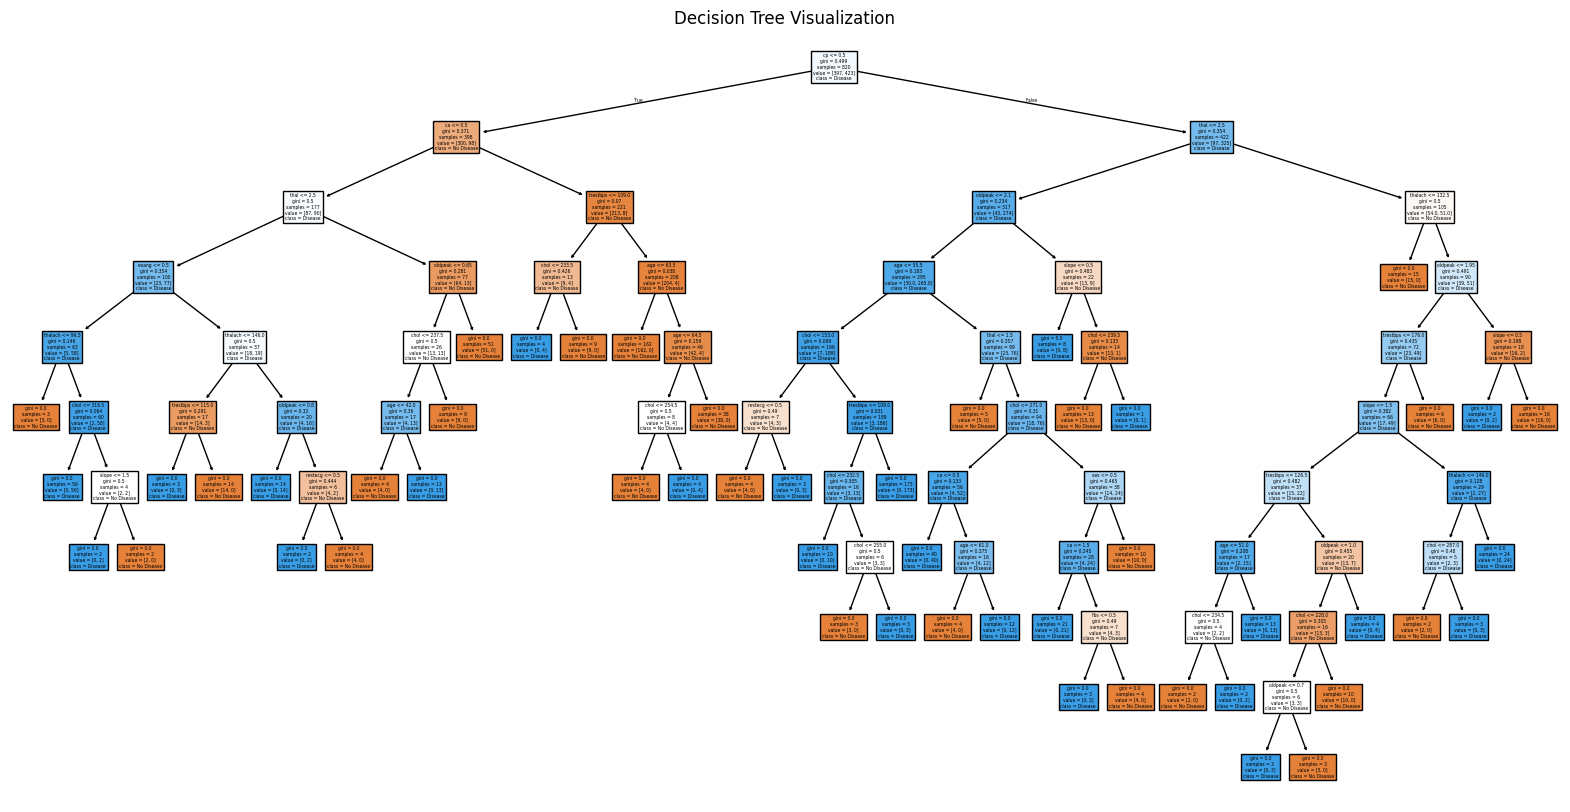


Pruned Decision Tree Accuracy: 0.8

Random Forest Accuracy: 0.9853658536585366

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Feature Importances:
 cp          0.135072
ca          0.127327
thalach     0.122169
oldpeak     0.121905
thal        0.110518
age         0.077908
chol        0.074822
trestbps    0.071171
exang       0.057594
slope       0.045782
sex         0.028731
restecg     0.018557
fbs         0.008444
dtype: float64


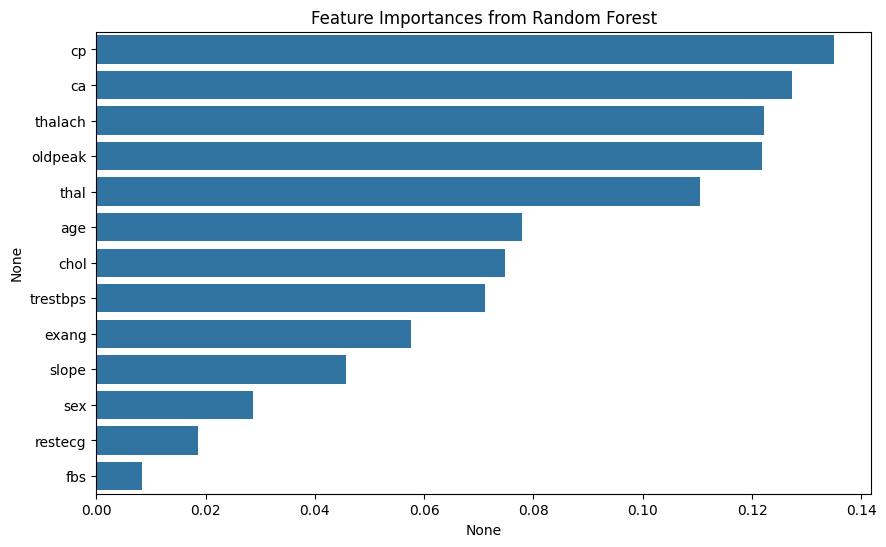


Cross-validation Accuracy (Decision Tree): 1.0
Cross-validation Accuracy (Random Forest): 0.9970731707317073


In [1]:
# Task 5: Decision Trees and Random Forests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

# 1. Load the dataset
df = pd.read_csv("heart.csv")

# 2. Data Exploration
print("First 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

# 3. Features and Target
X = df.drop("target", axis=1)
y = df["target"]

# 4. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 6. Accuracy & Report
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# 7. Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 8. Check Overfitting by limiting max_depth
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pruned = dt_pruned.predict(X_test)
print("\nPruned Decision Tree Accuracy:", accuracy_score(y_test, y_pruned))

# 9. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# 10. Feature Importance
importances = rf_model.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", features)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=features, y=features.index)
plt.title("Feature Importances from Random Forest")
plt.show()

# 11. Cross-validation
cv_dt = cross_val_score(dt_model, X, y, cv=5)
cv_rf = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation Accuracy (Decision Tree):", np.mean(cv_dt))
print("Cross-validation Accuracy (Random Forest):", np.mean(cv_rf))
